In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

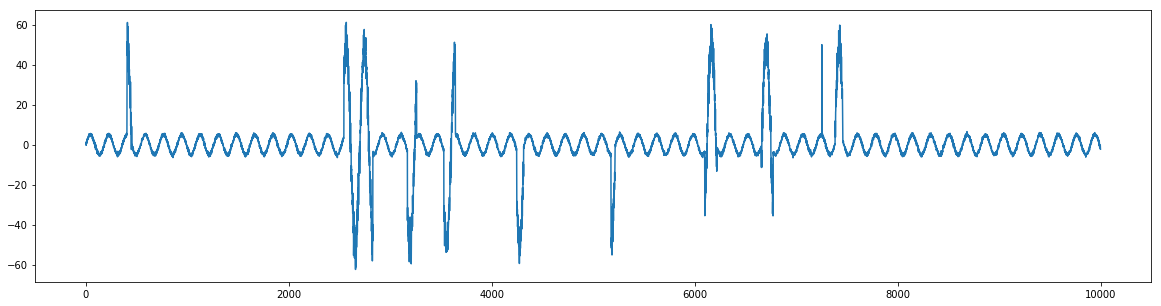

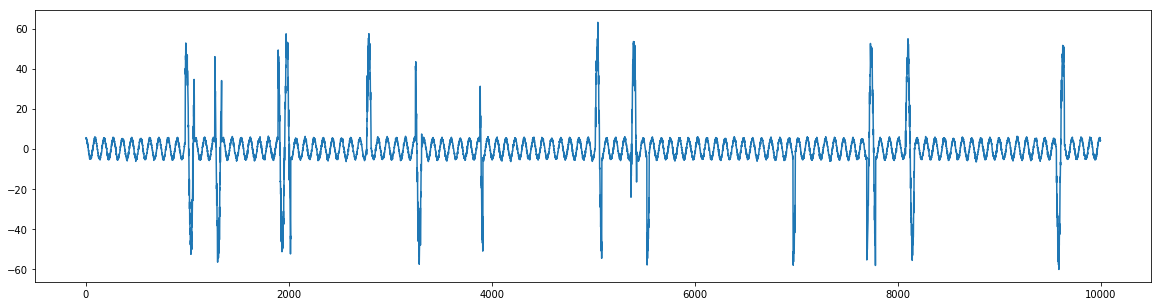

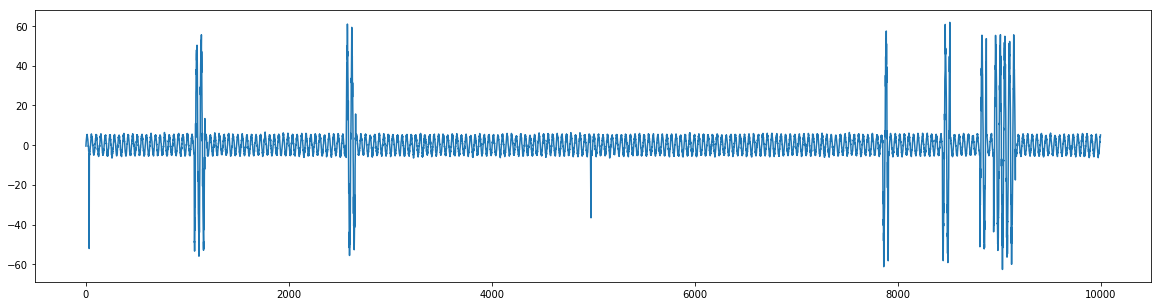

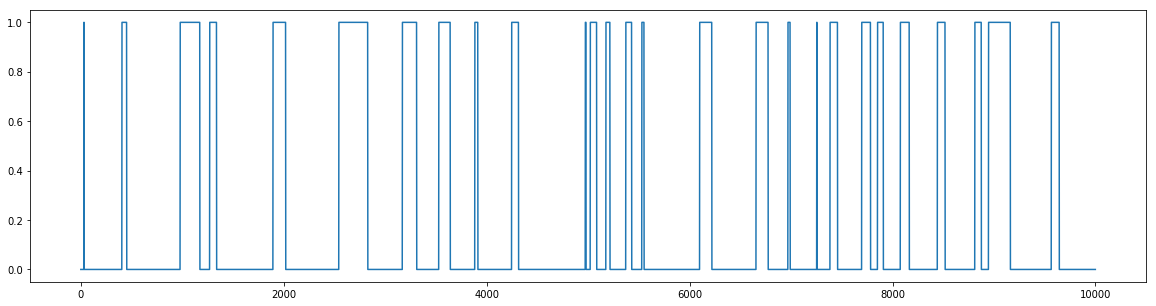

In [2]:
import math
import numpy as np
import random
length_tot = 10000
test_percent = 0.25 
anomaly_percent = 0.999
anomaly_length = 5
anomaly_amp = 10
anomaly_continue = 0.99


length = int(length_tot * (1 - test_percent))
length_test = int(length_tot * test_percent)

noise1 = np.random.normal(0,0.5,length_tot)
noise2 = np.random.normal(0,0.5,length_tot)
noise3 = np.random.normal(0,0.5,length_tot)

var1 = []
var2 = []
var3 = []
x = []

var1_is_anomaly = False
var2_is_anomaly = False
var3_is_anomaly = False

anomaly = []
num_anom = 0

for i in range(length_tot):
    var1_val = math.sin(math.radians(i * 2)) * 5 + noise1[i]
    if var1_is_anomaly or random.random() > anomaly_percent:
        var1_val *= anomaly_amp
        var1_is_anomaly = True

    var2_val = math.cos(math.radians(i) * 4) * 5 + noise2[i]
    if var2_is_anomaly or random.random() > anomaly_percent:
        var2_val *= anomaly_amp
        var2_is_anomaly = True

    var3_val = math.sin(math.radians(i) * 8) * 5 + noise3[i]
    if var3_is_anomaly or random.random() > anomaly_percent:
        var3_val *= anomaly_amp
        var3_is_anomaly = True
            
    if var1_is_anomaly or var2_is_anomaly or var3_is_anomaly:
        anomaly.append(1)
        num_anom += 1
    else:
        anomaly.append(0)
        
    var1.append(var1_val)
    var2.append(var2_val)
    var3.append(var3_val)
    x.append(i)
    
    if var1_is_anomaly and random.random() > anomaly_continue:
        var1_is_anomaly = False
    if var2_is_anomaly and random.random() > anomaly_continue:
        var2_is_anomaly = False
    if var3_is_anomaly and random.random() > anomaly_continue:
        var3_is_anomaly = False

        
plt.figure(figsize=(20,5))
plt.plot(x, var1)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(x, var2)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(x, var3)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(x, anomaly)
plt.show()


In [3]:
## Calculate transition matrix
norm_norm = 0.0
norm_anom = 0.0
anom_norm = 0.0
anom_anom = 0.0

for i, anom in enumerate(anomaly):
    if i < len(anomaly) - 1:
        # normal -> normal
        if anom < 1 and anomaly[i + 1] < 1:
            norm_norm += 1
            
        # normal -> anomaly
        if anom < 1 and anomaly[i + 1] > 0:
            norm_anom += 1
        
        # anomaly -> normal
        if anom > 0 and anomaly[i + 1] < 1:
            anom_norm += 1
        
        # anomaly -> anomaly
        if anom > 0 and anomaly[i + 1] > 0:
            anom_anom += 1
    else:
        if anom < 1:
            norm_norm += 1
        else:
            anom_anom += 1

norm_norm = norm_norm / (len(anomaly) - num_anom)
norm_anom = norm_anom / (len(anomaly) - num_anom)
anom_norm = anom_norm / num_anom
anom_anom = anom_anom / num_anom

print "normal -> normal:   ",
print norm_norm * 100, "%"
print "normal -> anomaly:   ",
print norm_anom * 100, "%"
print "sum normal -> X:   ",
print (norm_norm + norm_anom) * 100, "%"

print "anomaly -> normal:  ",
print anom_norm * 100, "%"
print "anomaly -> anomaly: ",
print anom_anom * 100, "%"
print "sum anomaly -> X:  ",
print (anom_anom + anom_norm) * 100, "%"

normal -> normal:    99.6508470193 %
normal -> anomaly:    0.349152980732 %
sum normal -> X:    100.0 %
anomaly -> normal:   1.19100132333 %
anomaly -> anomaly:  98.8089986767 %
sum anomaly -> X:   100.0 %


In [4]:
from scipy import stats
var1 = stats.zscore(var1)
var2 = stats.zscore(var2)
var3 = stats.zscore(var3)

In [ ]:
## Clustering
# %matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D
from skfuzzy.cluster import cmeans
import time


data = np.array([var1, var2, var3])
clusters = np.arange(1.1, 2.1, 0.1)
fpcs = []

plt.figure(figsize=(20,10))
for cluster in clusters:
    print '{0}%\r'.format(int(cluster/float(clusters[-1]) * 100)),
    min_centers, u, u0, d, jm, p, fpc = cmeans(data, 20, cluster, 1e-4, 1e4)
    fpcs.append(fpc)

print "max:", np.max(fpcs, axis=0)
print "argmax:", np.argmax(fpcs, axis=0)

plt.plot(clusters, fpcs)
plt.show()

#n_clusters = 20
#data = np.array([var1, var2, var3])
#start = time.time()
#min_centers, u, u0, d, jm, p, fpc = cmeans(data, n_clusters, 1.1, 1e-4, 1e4)
#print "done in:", time.time() - start, " s"
#print "FPC =", fpc, "(1 is best)"

labels = np.argmax(u, axis=0)

#data = np.array(data)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#for i, label in enumerate(mem):
#    if label == 0:
#        ax.scatter(data[i][0], data[i][1], data[i][2], color='blue')
#    if label == 1:
#        ax.scatter(data[i][0], data[i][1], data[i][2], color='red')
#    if label == 2:
#        ax.scatter(data[i][0], data[i][1], data[i][2], color='green')
#    if label == 3:
#        ax.scatter(data[i][0], data[i][1], data[i][2], color='yellow')


#ax.scatter(min_centers[:,0], min_centers[:,1], min_centers[:,2], color='cyan')
#plt.show()

In [6]:
emission_matrix = []

for state in range(2):
    num_labels = np.array([0.0] * n_clusters)
    for i, curr_state in enumerate(anomaly):
        if curr_state == state:
            num_labels[labels[i]] += 1
    emission_matrix.append(num_labels / num_labels.sum())
    #print num_labels
#print emission_matrix

#zz = []
#for i, val in enumerate(labels):
#    if val == 0:
#        zz.append(i)
#        print i
#for index in zz:
#    print anomaly[index]

In [7]:
var1_test = var1[length:]
var2_test = var2[length:]
var3_test = var3[length:]

label_test = labels[length:]
x_test = x[length:]
anomaly_test = anomaly[length:]

var1 = var1[:length]
var2 = var2[:length]
var3 = var3[:length]

label = labels[:length]
x = x[:length]
anomaly = anomaly[:length]

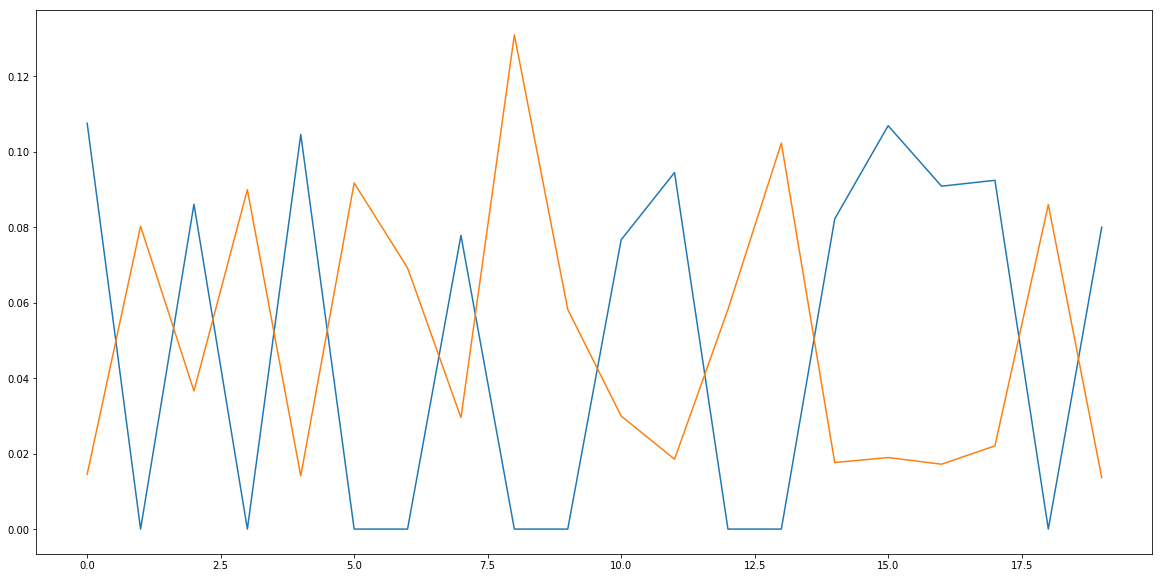

In [8]:
#print "\tN\tA"
#print "sum:\t%.1f\t%.1f" % (emission_matrix[0].sum() * 100, emission_matrix[1].sum() * 100)
#for i, row in enumerate(emission_matrix[0]):
    #if row == 0 and emission_matrix[1][i] == 0:
        #print "FUUUUUUUUUUUUUUUUUUU"
    #print "%d:\t%.1f\t%.1f" % (i, row * 100, emission_matrix[1][i] * 100)

plt.figure(figsize=(20,10))  
plt.plot(range(n_clusters), emission_matrix[0])
plt.plot(range(n_clusters), emission_matrix[1])
plt.show()

In [9]:
from hmmlearn import hmm

start_prob = np.array([anomaly_percent, 1 - anomaly_percent])
trans = np.array([[norm_norm, norm_anom],
                  [anom_norm, anom_anom]])

model = hmm.GaussianHMM(n_components=2, algorithm="viterbi")
#model.
model.startprob_ = start_prob
model.transmat_ = trans
model.emissionprob_ = emission_matrix

X = np.array([label]).T
model = model.fit(X) 
hidden_states = model.predict(X)

tot = 0.0
correct = 0
for i in range(len(hidden_states)):
    tot += 1
    if anomaly[i] == hidden_states[i]:
        correct += 1
print "Correct:", (correct / tot) * 100, "%"
    

Correct: 37.7333333333 %


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWa

In [10]:
X_test = np.array([label_test]).T
a = model.score(X_test) 
print "probability", math.exp(a), "%"

probability 0.0 %


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


probability 0.0 %
Correct: 38.04 %


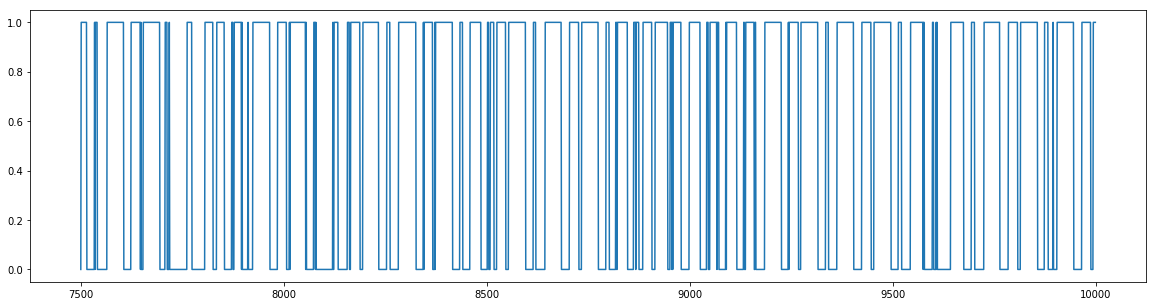

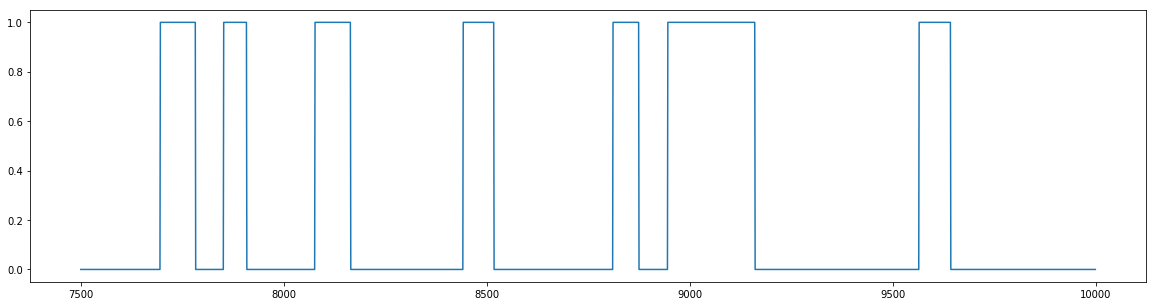

In [11]:
a, guess = model.decode(X_test)
print "probability", math.exp(a), "%"

tot = 0.0
correct = 0
for i in range(len(anomaly_test)):
    tot += 1
    if anomaly_test[i] == guess[i]:
        correct += 1
print "Correct:", (correct / tot) * 100, "%"

plt.figure(figsize=(20,5))
plt.plot(x_test, guess)
plt.show()
plt.figure(figsize=(20,5))
plt.plot(x_test, anomaly_test)
plt.show()

[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
